In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [44]:
df = pd.read_csv('Data/Taxi.csv')
data_dictionary = pd.read_excel('Data/taxi_dic.xlsx')

# EDA

In [45]:
data_dictionary

,Column name,Description
0,ID,Trip identification number
1,VendorID,A code indicating the TPEP provider that provi...
2,NaN,NaN
3,NaN,"1= Creative Mobile Technologies, LLC;"
4,NaN,NaN
5,NaN,2= VeriFone Inc.
6,tpep_pickup_datetime,The date and time when the meter was engaged.
7,tpep_dropoff_datetime,The date and time when the meter was disengaged.
8,Passenger_count,The number of passengers in the vehicle.
9,NaN,NaN


In [46]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [47]:
df = df.drop(['RatecodeID','store_and_fwd_flag','extra','mta_tax','improvement_surcharge'],axis=1)

In [48]:
date_cols = df[['tpep_pickup_datetime','tpep_dropoff_datetime']]
for i in date_cols:
    df[i] = pd.to_datetime(df[i])

In [49]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

In [50]:
df['pickup_hour'].value_counts()

19    1454
18    1449
20    1295
21    1281
14    1224
17    1216
22    1213
15    1167
16    1132
13    1127
12    1114
9     1112
11    1088
10    1040
8     1020
23    1006
7      857
0      737
1      525
6      499
2      386
3      287
4      235
5      235
Name: pickup_hour, dtype: int64

In [51]:
df['duration_minutes'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration_minutes'] = df['duration_minutes'].astype('timedelta64[m]')
df_period0 = df[df['duration_minutes']== 0 ]

In [52]:
df = df.drop(df[df['duration_minutes']<= 0].index)

In [53]:
df = df.drop(df[df['total_amount'] < 0].index)

In [54]:
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

In [55]:
df_distance0 = df[df['trip_distance'] == 0]
df = df.drop(df[df['trip_distance'] == 0].index)

In [56]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
tip_amount               0
tolls_amount             0
total_amount             0
pickup_hour              0
duration_minutes         0
day                      0
month                    0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22452 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22452 non-null  int64         
 1   VendorID               22452 non-null  int64         
 2   tpep_pickup_datetime   22452 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22452 non-null  datetime64[ns]
 4   passenger_count        22452 non-null  int64         
 5   trip_distance          22452 non-null  float64       
 6   PULocationID           22452 non-null  int64         
 7   DOLocationID           22452 non-null  int64         
 8   payment_type           22452 non-null  int64         
 9   fare_amount            22452 non-null  float64       
 10  tip_amount             22452 non-null  float64       
 11  tolls_amount           22452 non-null  float64       
 12  total_amount           22452 non-null  float64       
 13  p

In [58]:
df.describe(include='all')

C:\Users\Ne\AppData\Local\Temp/ipykernel_24340/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_hour,duration_minutes,day,month
count,2.245200e+04,22452.000000,22452,22452,22452.000000,22452.000000,22452.000000,22452.000000,22452.000000,22452.000000,22452.000000,22452.000000,22452.000000,22452.000000,22452.000000,22452,22452
unique,NaN,NaN,22442,22441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,12
top,NaN,NaN,2017-03-21 15:29:49,2017-11-19 21:21:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,March
freq,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3378,2018
first,NaN,NaN,2017-01-01 00:08:25,2017-01-01 00:17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.674776e+07,1.556743,NaN,NaN,1.644976,2.941011,162.300998,161.476260,1.330616,12.928511,1.823044,0.310237,16.199158,13.728354,16.640834,NaN,NaN
std,3.272907e+07,0.496781,NaN,NaN,1.287484,3.660531,66.573337,70.091653,0.487373,10.737910,2.420828,1.388674,13.324600,6.217869,61.628630,NaN,NaN
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.010000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,2.858039e+07,1.000000,NaN,NaN,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.000000,8.750000,9.000000,6.000000,NaN,NaN


In [59]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_hour,duration_minutes,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,13.0,2.76,0.0,16.56,8,14.0,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,186,43,1,16.0,4.00,0.0,20.80,14,26.0,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,6.5,1.45,0.0,8.75,7,7.0,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,188,97,1,20.5,6.39,0.0,27.69,13,30.0,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,2,16.5,0.00,0.0,17.80,23,16.0,Saturday,April


In [60]:
print(df['VendorID'].value_counts())
print(df['payment_type'].value_counts())

2    12500
1     9952
Name: VendorID, dtype: int64
1    15176
2     7164
3       77
4       35
Name: payment_type, dtype: int64


In [61]:
df['duration_by_distance'] = df['duration_minutes'] / df['trip_distance']

In [62]:
period_by_distance = pd.DataFrame(df.groupby('pickup_hour')['duration_by_distance'].mean())

In [63]:
time_use = pd.DataFrame(df.groupby('pickup_hour')['duration_minutes'].mean())

In [64]:
time_use

,duration_minutes
pickup_hour,
0,12.245542
1,16.330754
2,18.328084
3,11.862191
4,11.647577
5,11.467249
6,10.910751
7,14.909091
8,16.268317


# Data visualization
box plot
histrogram
scatter
bar chart
line chart


<AxesSubplot:title={'center':'Number of user by time'}, xlabel='pickup_hour', ylabel='Count'>

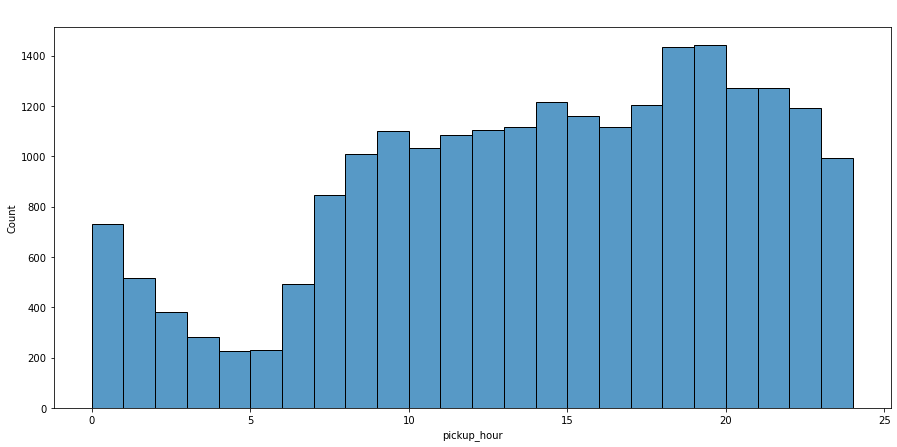

In [207]:
plt.figure(figsize=(15,7))
plt.title('Number of user by time',color='white',size = 20)
sns.histplot(df['pickup_hour'],bins=range(0,25,1))

<AxesSubplot:title={'center':'trip distance'}, xlabel='trip_distance'>

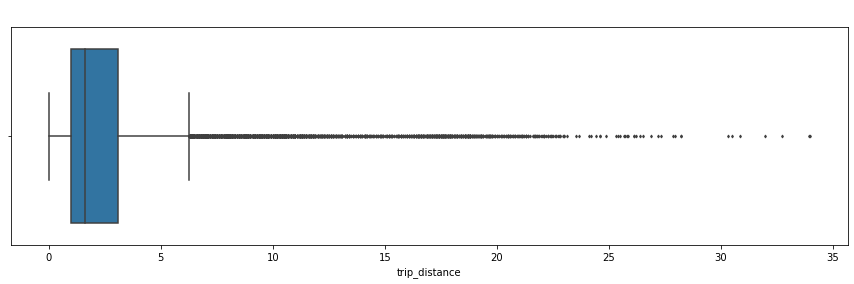

In [119]:
plt.figure(figsize=(15,4))
plt.title('trip distance',color='white',size = 20)
sns.boxplot(data=df,x='trip_distance',fliersize=2)

<AxesSubplot:title={'center':'trip distance'}, xlabel='trip_distance', ylabel='Count'>

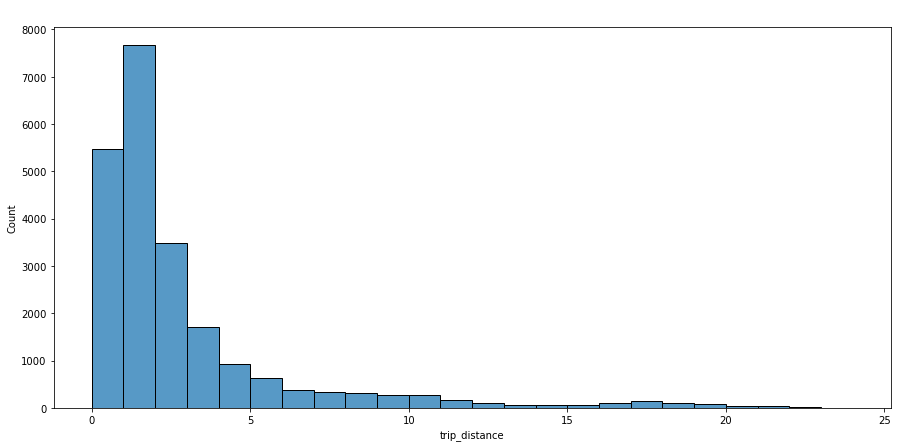

In [120]:
plt.figure(figsize=(15,7))
plt.title('trip distance',color='white',size = 20)
sns.histplot(df['trip_distance'],bins=range(0,25,1))


<AxesSubplot:title={'center':'tip amount'}, xlabel='tip_amount'>

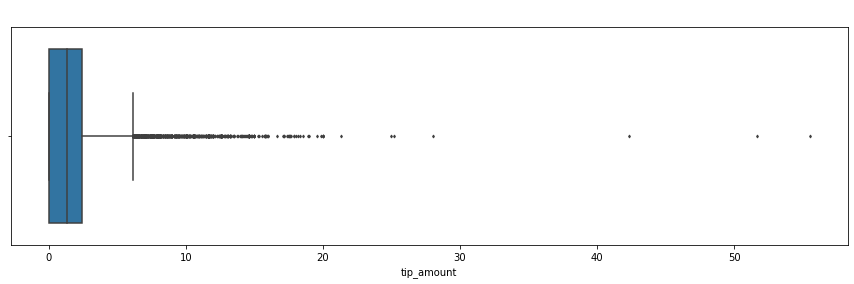

In [121]:
plt.figure(figsize=(15,4))
plt.title('tip amount',size = 20,color='white')
sns.boxplot(data=df,x='tip_amount',fliersize=2)

Text(0.5, 1.0, 'Tip amount by vendor')

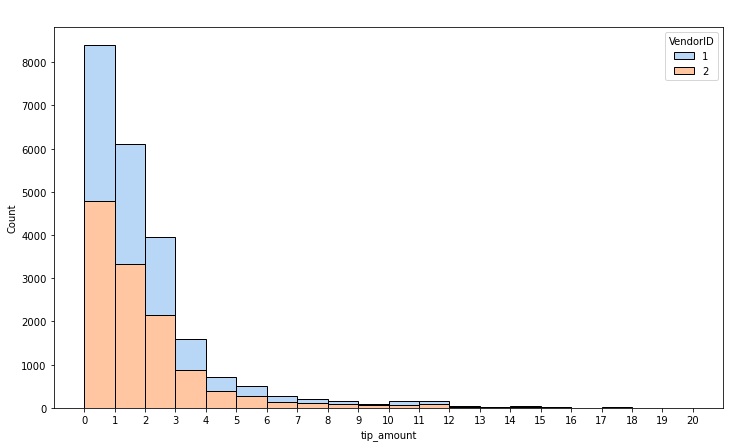

In [122]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df,x='tip_amount',bins=range(0,21,1),
                 hue = 'VendorID',
                 multiple='stack',
                 palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor',size = 20 ,color= 'white')

<AxesSubplot:title={'center':'total amount'}, xlabel='total_amount'>

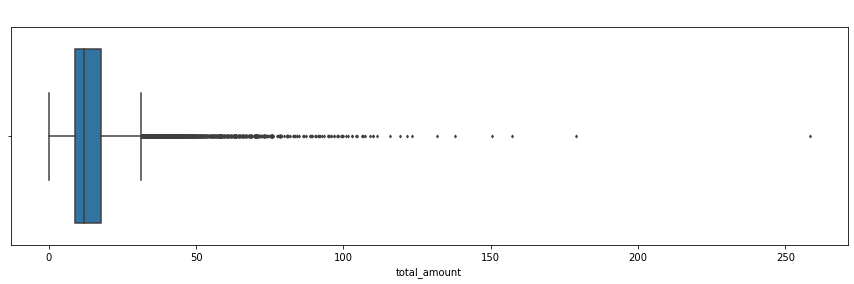

In [123]:
plt.figure(figsize=(15,4))
plt.title('total amount',color = 'white',size=20)
sns.boxplot(data=df,x='total_amount',fliersize=2)

Text(0.5, 1.0, 'Total amount by vendor')

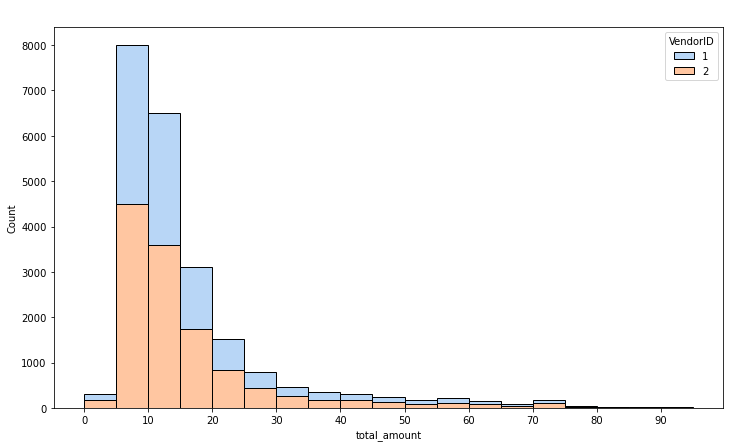

In [124]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df,x='total_amount',bins=range(0,100,5),
                 hue = 'VendorID',
                 multiple='stack',
                 palette='pastel')
ax.set_xticks(range(0,100,10))
ax.set_xticklabels(range(0,100,10))
plt.title('Total amount by vendor',size = 20 ,color= 'white')

In [125]:
df['passenger_count'].value_counts()

1    15939
2     3276
5     1140
3      948
6      688
4      450
0       32
Name: passenger_count, dtype: int64

<AxesSubplot:title={'center':'passenger count'}, xlabel='passenger_count', ylabel='Count'>

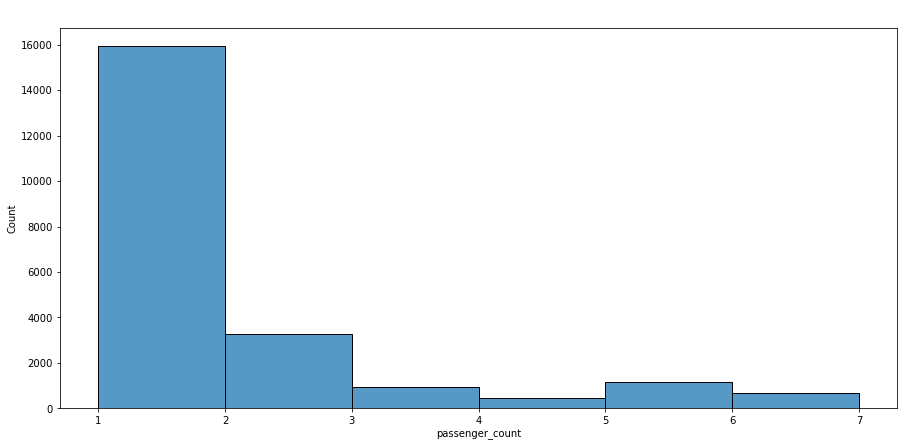

In [126]:
plt.figure(figsize=(15,7))
plt.title('passenger count',size = 20,color='white')
sns.histplot(data=df,x='passenger_count',bins=range(1,8,1))

<AxesSubplot:title={'center':'average time spent(minutes)'}, xlabel='pickup_hour', ylabel='duration_minutes'>

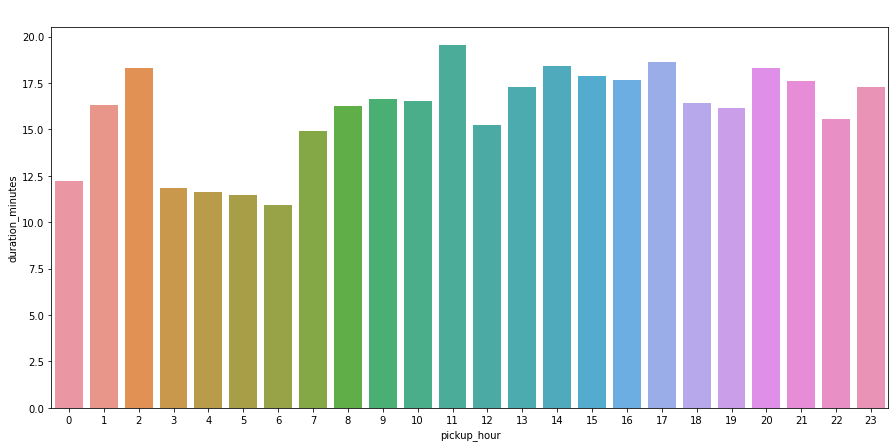

In [81]:
plt.figure(figsize=(15,7))
plt.title('average time spent(minutes)',color='white',size = 20)
sns.barplot(x=time_use.index,y=time_use['duration_minutes'])

<AxesSubplot:title={'center':'duration by distance'}, xlabel='pickup_hour', ylabel='duration_by_distance'>

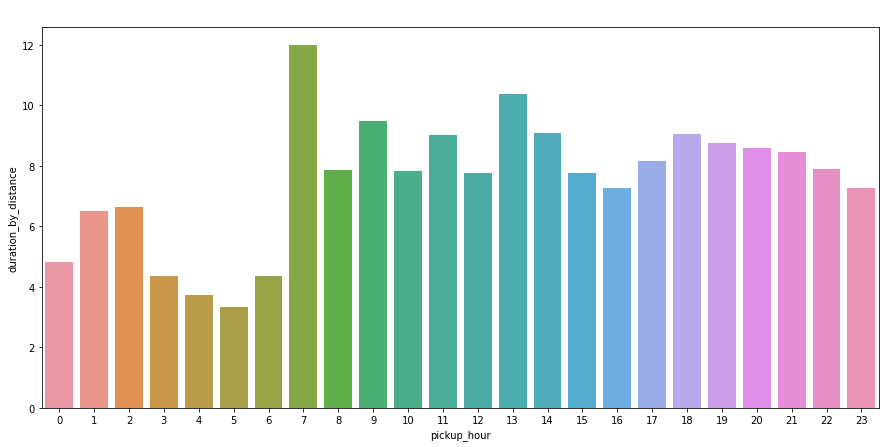

In [66]:
plt.figure(figsize=(15,7))
plt.title('duration by distance',color='white',size = 20)
sns.barplot(x=period_by_distance.index,y=period_by_distance['duration_by_distance'])

In [76]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
users_by_day = pd.DataFrame(df.groupby('day')['day'].count()).reindex(index=day_order)

Text(0.5, 0, 'day')

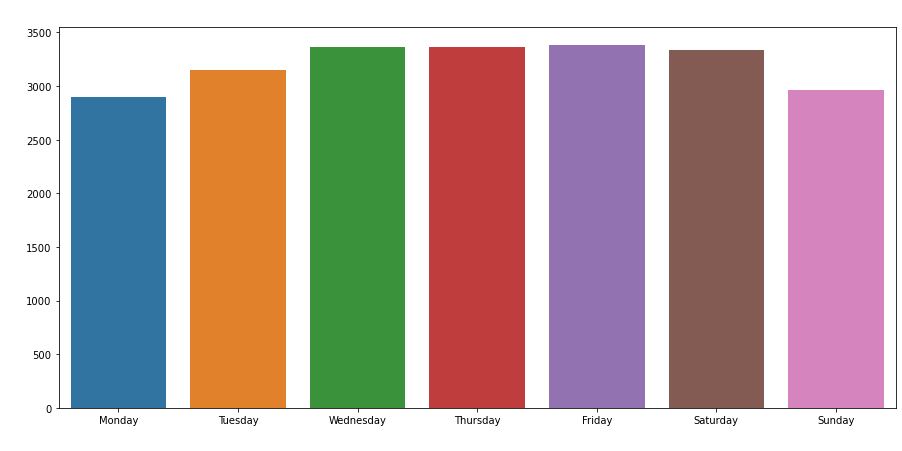

In [93]:
plt.figure(figsize=(15,7))
plt.title('Number of ride count',color='white',size = 20)
ax = sns.barplot(x=users_by_day.index,y=users_by_day['day'])
ax.set_ylabel('number of ride count',color='white',size=15)
ax.set_xlabel('day',color='white',size=15)

In [84]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
users_by_month = pd.DataFrame(df.groupby('month')['month'].count()).reindex(index=month_order)

Text(0.5, 0, 'month')

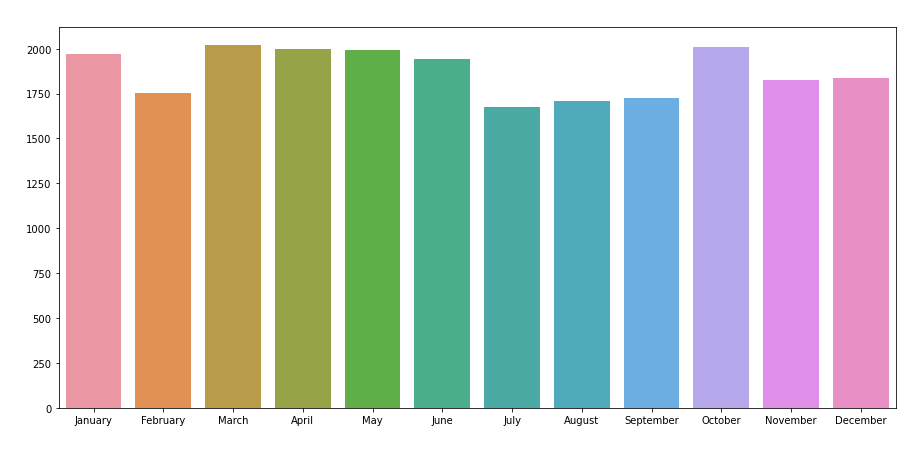

In [92]:
plt.figure(figsize=(15,7))
plt.title('Number of ride count',color='white',size = 20)
ax = sns.barplot(x=users_by_month.index,y=users_by_month
                 ['month'])
ax.set_ylabel('number of ride count',color='white',size=15)
ax.set_xlabel('month',color='white',size=15)

In [101]:
average_distance_by_day = pd.DataFrame(df.groupby('day')['trip_distance'].mean()).reindex(index=day_order)

Text(0.5, 0, 'day')

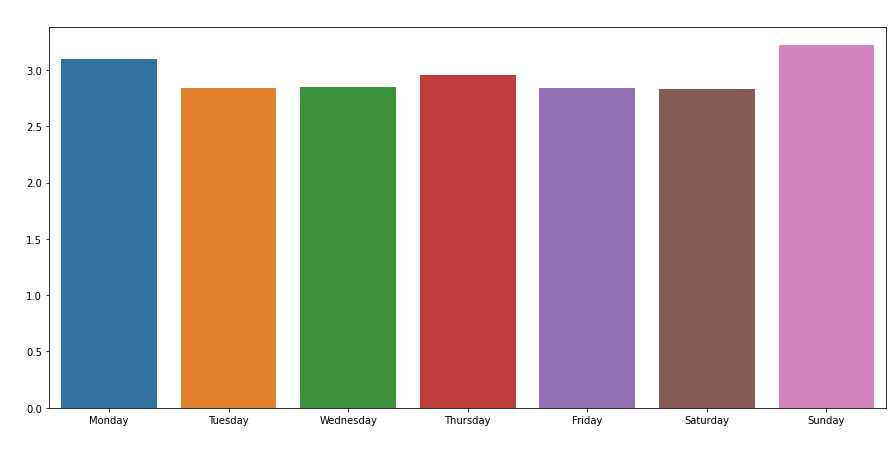

In [104]:
plt.figure(figsize=(15,7))
plt.title('Average distance',color='white',size = 20)
ax = sns.barplot(x=average_distance_by_day.index,y=average_distance_by_day
                 ['trip_distance'])
ax.set_ylabel('distance',color='white',size=15)
ax.set_xlabel('day',color='white',size=15)

In [107]:
average_distance_by_month = pd.DataFrame(df.groupby('month')['trip_distance'].mean()).reindex(index=month_order)

Text(0.5, 0, 'month')

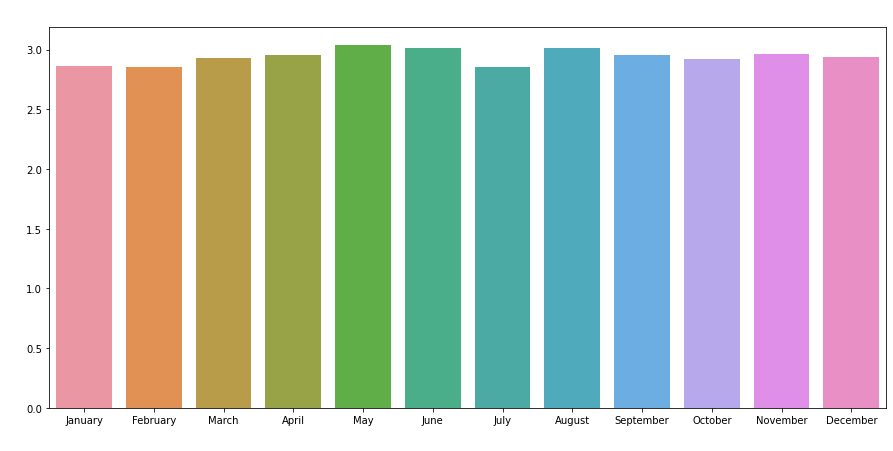

In [108]:
plt.figure(figsize=(15,7))
plt.title('Average distance',color='white',size = 20)
ax = sns.barplot(x=average_distance_by_month.index,y=average_distance_by_month
                 ['trip_distance'])
ax.set_ylabel('distance',color='white',size=15)
ax.set_xlabel('month',color='white',size=15)

In [109]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,pickup_hour,duration_minutes,day,month,duration_by_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,13.0,2.76,0.0,16.56,8,14.0,Saturday,March,4.191617
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,186,43,1,16.0,4.00,0.0,20.80,14,26.0,Tuesday,April,14.444444
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,6.5,1.45,0.0,8.75,7,7.0,Friday,December,7.000000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,188,97,1,20.5,6.39,0.0,27.69,13,30.0,Sunday,May,8.108108
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,2,16.5,0.00,0.0,17.80,23,16.0,Saturday,April,3.661327


In [113]:
revenue_day = pd.DataFrame(df.groupby('day')['total_amount'].sum()).reindex(index=day_order)

Text(0.5, 0, 'day')

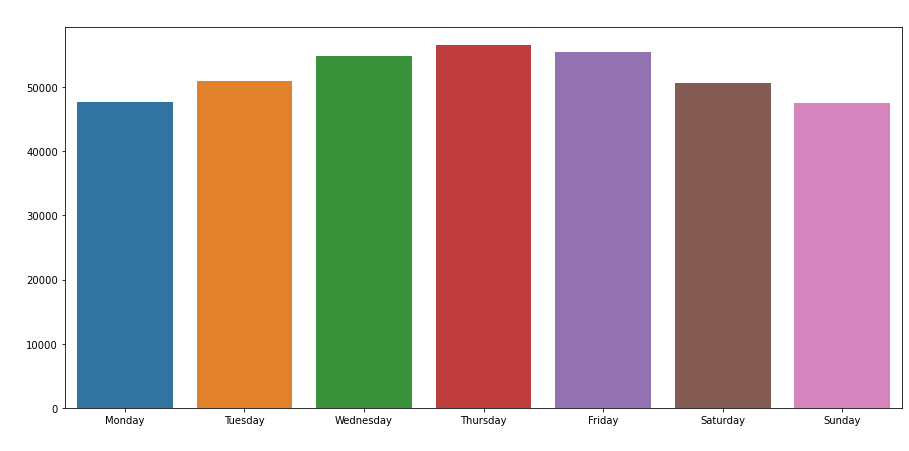

In [116]:
plt.figure(figsize=(15,7))
plt.title('Total revenue',color='white',size = 20)
ax = sns.barplot(x=revenue_day.index,y=revenue_day
                 ['total_amount'])
ax.set_ylabel('revenue',color='white',size=15)
ax.set_xlabel('day',color='white',size=15)

In [118]:
revenue_month = pd.DataFrame(df.groupby('month')['total_amount'].sum()).reindex(index=month_order)

Text(0.5, 0, 'month')

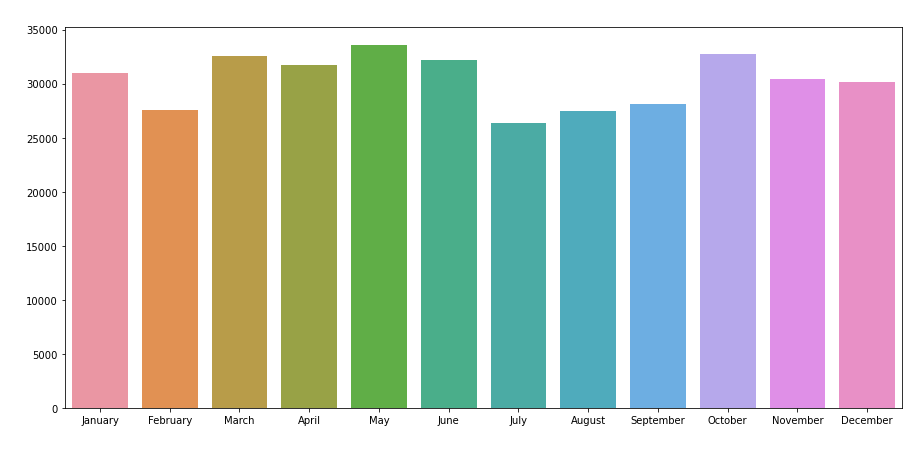

In [119]:
plt.figure(figsize=(15,7))
plt.title('Total revenue',color='white',size = 20)
ax = sns.barplot(x=revenue_month.index,y=revenue_month
                 ['total_amount'])
ax.set_ylabel('revenue',color='white',size=15)
ax.set_xlabel('month',color='white',size=15)

In [155]:
PU_count = pd.DataFrame(df['PULocationID'].value_counts()).sort_values('PULocationID',ascending=False)
PU_count = PU_count.reset_index().rename(columns={'PULocationID':'user_count','index':'PULocationID'})

In [164]:
PU_count.head()

,PULocationID,user_count
0,237,885
1,161,856
2,186,785
3,236,784
4,162,767


In [157]:
DO_count = pd.DataFrame(df['DOLocationID'].value_counts()).sort_values('DOLocationID',ascending=False)
DO_count = DO_count.reset_index().rename(columns={'DOLocationID':'user_count','index':'DOLocationID'})

In [165]:
DO_count.head()

,DOLocationID,user_count
0,161,852
1,236,800
2,237,754
3,230,754
4,170,693


In [160]:
use_tolls = pd.DataFrame(df[df['tolls_amount'] > 0].groupby('DOLocationID')['tolls_amount'].count()).sort_values('tolls_amount',ascending=False)   
use_tolls = use_tolls.rename(columns={'tolls_amount':'tolls_count'})

In [166]:
use_tolls.head()

,tolls_count
DOLocationID,
138,172
132,128
230,69
161,44
162,41


In [ ]:
DO_airport = pd.DataFrame(df[df['tolls_amount'] > 0].groupby('DOLocationID')['tolls_amount'].count()).sort_values('tolls_amount',ascending=False)

# Hypothesis test
paymant type effects to total amount or not
Ho:average total amount between customers who credit cards and   
    customer who ues cash are equal
Ha:average total amount between customers who credit cards and   
    customer who ues cash are not equal(credit card > cash)
significant level = 5%

In [77]:
print('average tip by vendor',df[df['payment_type']==1]['tip_amount'].groupby(df['VendorID']).mean())
print('average total amount by vendor',df.groupby('VendorID')['total_amount'].mean())
print('average tip amount by payment type',df.groupby('payment_type')['tip_amount'].mean())
print('average total amount by payment type',df.groupby('payment_type')['total_amount'].mean())
print('average tip amount by passenger count',df[df['payment_type']==1]['tip_amount'].groupby(df['passenger_count']).mean())
print('average total amount by passenger count',df.groupby('passenger_count')['total_amount'].mean())

average tip by vendor VendorID
1    2.732815
2    2.727397
Name: tip_amount, dtype: float64
average total amount by vendor VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64
average tip amount by payment type payment_type
1    2.7298
2    0.0000
3    0.0000
4    0.0000
Name: tip_amount, dtype: float64
average total amount by payment type payment_type
1    17.663577
2    13.545821
3    13.579669
4    11.238261
Name: total_amount, dtype: float64
average tip amount by passenger count passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64
average total amount by passenger count passenger_count
0    17.624242
1    16.070787
2    17.390460
3    16.616842
4    16.673626
5    16.264121
6    16.089322
Name: total_amount, dtype: float64


In [20]:
credit_card = df[df['payment_type']==1]['total_amount']
cash = df[df['payment_type']==2]['total_amount']

In [21]:
stats.ttest_ind(a=credit_card,b=cash, equal_var=False)

Ttest_indResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91)

pvalue < 0.05 ; reject Ho
we should encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

passenger count effects to total amount or not Ho:average total amount between 1 passenger and more then 1 passenger are equal Ha:average total amount between 1 passenger and more then 1 passenger are not equal   significant level = 5%

In [57]:
passenger1 = df[df['passenger_count']==1]['total_amount']
passenger2 = df[df['passenger_count']>1]['total_amount']

In [58]:
stats.ttest_ind(a=passenger1,b=passenger2, equal_var=False)

Ttest_indResult(statistic=-3.59074694896474, pvalue=0.00033095404577990304)